### Table of Contents in this notebook 

* [분석배경 및 목적](#chapter1)
    
* [EDA 및 시각화](#chapter2)
    * [데이터 소개](#section_2_1)
    * [연속형 변수 EDA 및 시각화](#section_2_2)
    * [target, odometer 변수 상관관계 분석](#section_2_3)
    * [odommter, year 변수 EDA 및 시각화](#section_2_4)
    * [odometer, year 인사이트](#section_2_5)
    * [target, odometer, year 상관관계 분석 및 히트맵 시각화](#section_2_6)
    * [범주형 변수 분석](#section_2_7)
    * [범주형 변수 시각화(히스토그램)](#section_2_8)
    * [범주형 변수 인사이트](#section_2_9)
    * [title 라벨링](#section_2_10)
    * [location 라벨링](#section_2_11)
    * [paint 라벨링](#section_2_12)
    * [engine 라벨링](#section_2_13)
    * [year 라벨링](#section_2_14)
    * [특이점이 없는 isimported, transmission, fuel 라벨링](#section_2_15)
    * [라벨링 처리 후 데이터](#section_2_16)
* [모델링](#chapter3)
    * [linear Regression 모델](#section_3_1)
* [결과](#chapter4)


# 분석배경 및 목적 <a class="anchor" id="chapter1"></a>

전부터 자동차에 관심이 많았고, 자동차 관련 데이터 분석을 하고 싶다는 생각을 가지고 있었습니다.

마침 데이콘에서 중고차 가격 예측이라는 BASIC 대회가 열려 참가하게 되었고, 이 주제를 가지고 분석발표
목적은 중고차 가격 예측입니다.

# EDA 및 시각화 <a class="anchor" id="chapter2"></a>

# 데이터 소개 <a class="anchor" id="section_2_1"></a>


In [150]:
# 파일을 불러오고 분석할때 필요한 패키지 다운
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   
%matplotlib inline  

In [151]:
# csv 형식으로 된 데이터 파일을 읽어옵니다. 
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

In [152]:
#test 데이터 상위5개 확인
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000


In [153]:
#train 데이터 상위 5개 확인
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [154]:
# sample_submission 데이터 확인
sample_submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [155]:
# test 데이터 행 열 확인/np.shape() 함수를 사용
np.shape(test)

(436, 10)

In [156]:
# train 데이터 행 열 확인/np.shape() 함수를 사용
np.shape(train)

(1015, 11)

In [157]:
#결측값 유무 확인/ isnull() 함수로 결측값을 확인후 sum()함수로 각 변수의 결측값 수 확인
train.isnull().sum()

id              0
title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
year            0
target          0
dtype: int64

In [158]:
#결측값 유무 확인
test.isnull().sum()

id              0
title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
year            0
dtype: int64

# 연속형 변수 EDA 및 시각화 <a class="anchor" id="section_2_2"></a>

In [159]:
#odometer 와 target, year 변수를 연속형 변수로 봄. / describe() 다양한 통계량을 확인할수 있는 함수
train[['odometer','target','year']].describe()

,odometer,target,year
count,1015.000000,1.015000e+03,1015.000000
mean,116842.121182,8.243204e+06,2008.385222
std,105162.545836,1.239567e+07,35.592123
min,0.000000,4.000000e+05,1217.000000
25%,55918.000000,2.535000e+06,2006.000000
50%,94972.000000,4.215000e+06,2010.000000
75%,153224.000000,8.927500e+06,2014.000000
max,987322.000000,1.500150e+08,2020.000000


c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


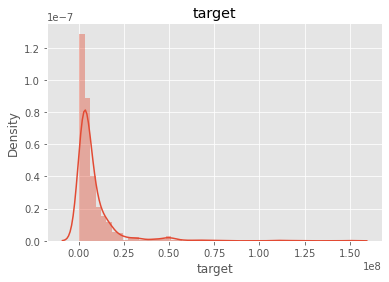

In [207]:
# tagret 변수 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot((train['target']))
plt.title(f'target')
plt.show()

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


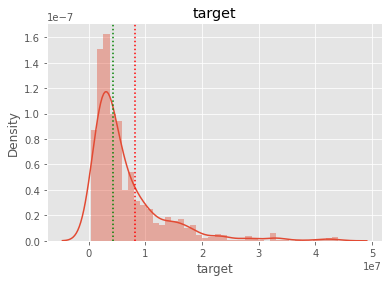

In [208]:
#보다 더 자세히 보기 위해 범위를 평균중심으로 3sigma 범위로 축소하여 중앙값과, 평균값 확인
mean = np.mean(train['target'])
std = np.sqrt(np.var(train['target']))

sns.distplot((train[train['target'] <=mean+3*std]['target'])) # 3-sigma
plt.title(f'target')
plt.axvline(x=mean, color='r', linestyle=':')
plt.axvline(x=np.median(train['target']), color='g', linestyle=':')
plt.show()

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


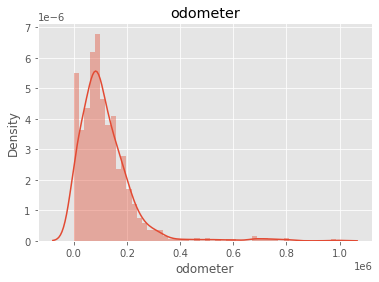

In [209]:
# odometer도 target과 같은 방식으로 분포를 확인.
sns.distplot((train['odometer']))
plt.title(f'odometer')
plt.show()

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


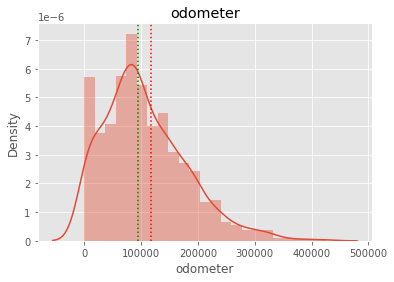

In [211]:
mean = np.mean(train['odometer'])
std = np.sqrt(np.var(train['odometer']))
md = np.median(train['odometer'])

sns.distplot((train[train['odometer'] <=mean+3*std]['odometer'])) # 3-sigma
plt.title(f'odometer')
plt.axvline(x=mean, color='r', linestyle=':')
plt.axvline(x=md, color='g', linestyle=':')
plt.show()

두개 모두 카이제곱 형태를 띠고 있음을 확인.

# target, odometer 변수 상관관계 분석 <a class="anchor" id="section_2_3"></a>

In [20]:
# target과 odometer 상관관계 분석
print(train[['target','odometer']].corr())

            target  odometer
target    1.000000 -0.261147
odometer -0.261147  1.000000


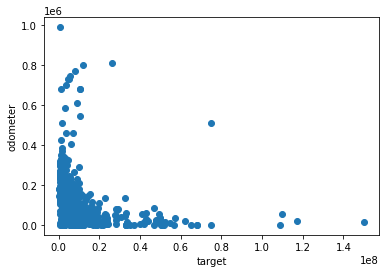

In [18]:
# target과 odometer 상관관계 분석
plt.scatter(train['target'], train['odometer'])
plt.xlabel('target')
plt.ylabel('odometer')
plt.show()

0.26수준으로 높지 않음을 확인

그래프를 보니 아래로 몰려있어 로그를 취해 재분석


In [22]:
print(pd.DataFrame({'target':train['target'],'odometer': -1 * np.log(train['odometer'])}).corr())

            target  odometer
target    1.000000  0.529695
odometer  0.529695  1.000000


c:\Users\USER\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


c:\Users\USER\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


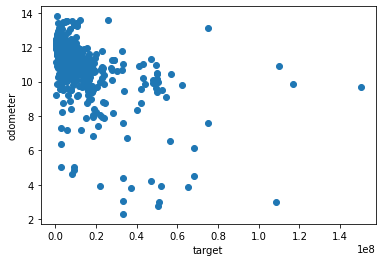

In [23]:
plt.scatter(train['target'], np.log(train['odometer']))
plt.xlabel('target')
plt.ylabel('odometer')
plt.show()


로그를 취한 후 이전보다 분산되는 것을 볼 수 있음.

상관관계도 0.52로 약 2배정도 올라간 것을 확인

이 변수는 그대로 사용하기보다는 로그를 취한 데이터로 사용하는 것이 더 적합해보임.

# odommter, year 변수 EDA 및 시각화 <a class="anchor" id="section_2_4"></a>

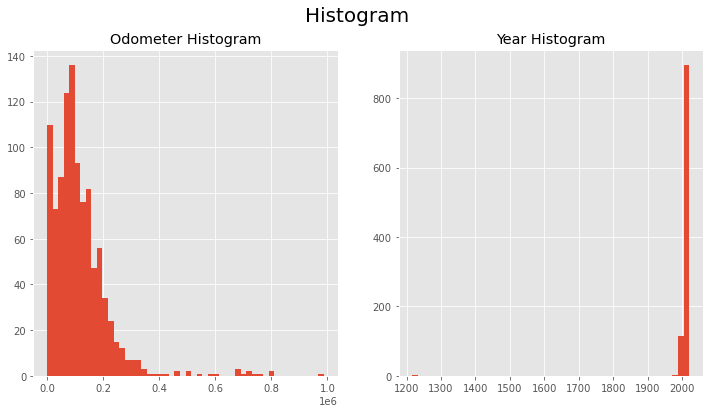

In [24]:
# odometer변수와 year변수를 막대그래프로 비교
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train.odometer, bins=50)
plt.title('Odometer Histogram')

plt.subplot(1,2,2)
plt.hist(train.year, bins=50)
plt.title('Year Histogram')
plt.show()


그래프를 보면, year에서 1900년도 이하인 데이터가 존재하여 데이터 분포 범위가 1200 범위부터 시작되는 것을 확인함.

따라서 year변수에서 1900년도 이하인 데이터가 얼마나 존재하는지 확인

In [26]:
#이상값 확인
train[train['year'] < 1900]


,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
415,415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,4-cylinder(I4),manual,diesel,white,1218,6015000
827,827,Mercedes-Benz/52,510053,Lagos,Locally used,6-cylinder(V6),manual,diesel,white,1217,75015000


In [28]:
#### 1218,1217년도 데이터가 존재하는것을 확인 후 오기입된 데이터라 판단하여 제거
train = train.drop('id', axis = 1).reset_index().drop('index', axis = 1).reset_index().rename({'index':'id'}, axis = 'columns')

In [33]:
# odometer변수와 year변수를 통해 각 컬럼의 평균값, 최대값, 최소값, 편차 확인
data_description = train.describe().iloc[:,1:3]
data_description

,odometer,year
count,1013.000000,1013.000000
mean,116171.015795,2009.946693
std,104147.052690,5.540466
min,0.000000,1980.000000
25%,55775.000000,2006.000000
50%,94803.000000,2010.000000
75%,152878.000000,2014.000000
max,987322.000000,2020.000000


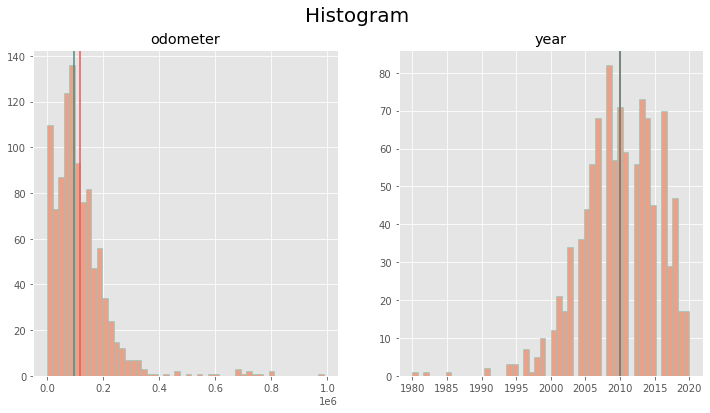

In [34]:
# 통계치를 숫자로만 보고 가늠하기 어렵다고 판단하여 각각 데이터를 히스토그램에 평균(빨강)과 중앙값(초록)을 선으로 표시
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train['odometer'], bins=50, color='#eaa18a', edgecolor='#7bcabf')
plt.title('odometer')
plt.axvline(data_description['odometer']['mean'], c='#f55354', label = f"mean = {round(data_description['odometer']['mean'], 2)}")
plt.axvline(data_description['odometer']['50%'], c='#518d7d', label = f"median = {round(data_description['odometer']['50%'], 2)}")

plt.subplot(1,2,2)
# 수치형 데이터 통계치 그래프
plt.hist(train['year'], bins = 50, color='#eaa18a', edgecolor='#7bcabf')
plt.title('year')
plt.axvline(data_description['year']['mean'], c='#f55354', label = f"mean = {round(data_description['year']['mean'], 2)}")
plt.axvline(data_description['year']['50%'], c='#518d7d', label = f"median = {round(data_description['year']['50%'], 2)}")

# odometer, year 인사이트 <a class="anchor" id="section_2_5"></a>

In [50]:
# Odometer 인사이트
print('Odometer 평균은', round(data_description['odometer']['mean']), '입니다')
print('Odometer 중앙값은', round(data_description['odometer']['50%']), '입니다')

Odometer 평균은 116171 입니다
Odometer 중앙값은 94803 입니다


평균 주행거리는 116171, 중앙값은 94803으로
평균에 비해 중앙값이 좌측으로 치우쳐져 있는 것을 알 수 있음

또한 데이터 분포를 보면 좌편향 되어있는 것을 보아 주행거리가 데이터 평균에 비하여 매우 큰 값이 드물게 존재하는 것을 확인해볼 수 있다

-> 따라서 주행거리 0 ~ 987,322 사이 범위에서 비교적 적은 거리의 데이터가 많이 분포한다 것을 확인

In [92]:
# year 인사이트
print('Year 평균은', round(data_description['year']['mean']), '입니다')
print('Year 중앙값은', round(data_description['year']['50%']), '입니다')

Year 평균은 2010 입니다
Year 중앙값은 2010 입니다


평균 연식과 중앙값은 2010으로
평균과 중앙값이 2010년도 인 것을 알 수 있음.

또한 데이터 분포를 보면 우편향 되어있는 것을 보아 연식이 데이터 평균에 비하여 매우 작은 값이 드물게 존재하는 것을 확인해볼 수 있다.

-> 따라서 1980~2020 범위에서 비교적 최신 연도의 데이터가 많이 분포한다는 것을 확인

# target, odometer, year 상관관계 분석 및 히트맵 시각화 <a class="anchor" id="section_2_6"></a>

In [52]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[['odometer', 'year', 'target']]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

<ipython-input-52-2f0ff168659d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
c:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Text(0.5, 1.0, 'Correlation between features')

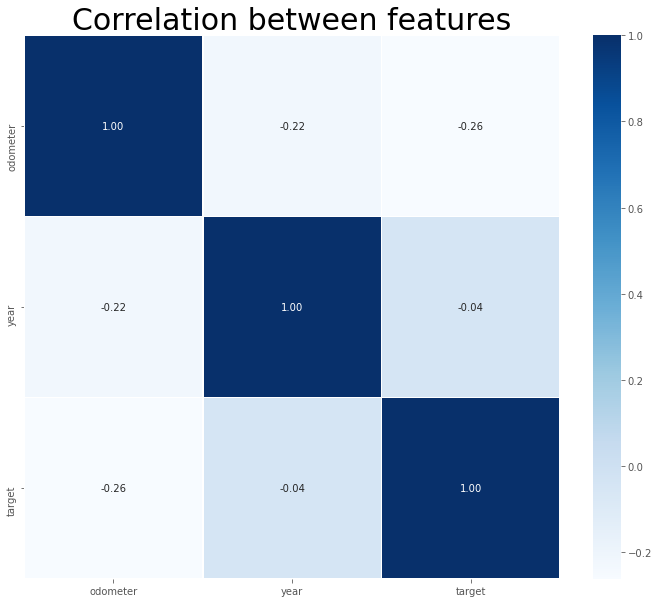

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [54]:
# Target을 기준으로 다른 변수와의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['target'].sort_values(ascending=False), columns=['target'])
df_temp28.style.background_gradient(cmap='viridis')

,target
target,1.000000
year,-0.042637
odometer,-0.261147


그래프를 보니 year가 높은 양의 상관관계가 있는것으로 이는 최근 연도일수록 가격이 높아진다는 것으로 해석

또한 odometer도 -0.29로 음의 상관관계를 띄므로 전반적으로 주행거리가 많을 수록 가격이 낮아질 것이라고 해석

# 범주형 변수 분석 <a class="anchor" id="section_2_7"></a>

In [56]:
#범주형 변수
#describe에 include="object"을 주면 범주형 변수의 count, unique, top, freq 통계치를 얻을 수 있음
train.describe(include="object")

,title,location,isimported,engine,transmission,fuel,paint
count,1015,1015,1015,1015,1015,1015,1015
unique,203,13,3,8,2,2,76
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,129,792,744,618,965,970,292


unique 행을 보면 title(201)과 paint은(76)의 카테고리가 매우 많이 있는 것으로 보고 다른 변수들과 비슷하게 줄여주고자 함.

In [57]:
# 도요타, 혼다, 렉서스, 벤츠 등 title 변수를 통하여 브랜드 별 카테고리 변수로 추가해주면 분석에 용이 할 것이라 판단.
train['title'].value_counts()[:20]

Toyota Camry            129
Toyota Corolla          108
Toyota Highlander        50
Toyota Sienna            49
Toyota RAV 4             40
Honda Accord             38
Lexus RX 350             33
Lexus ES 350             24
Toyota Venza             16
Lexus GX 460             16
Honda Pilot              15
Lexus LX 570             14
Mercedes-Benz ML 350     13
Toyota Avalon            13
Mercedes-Benz E 350      12
Toyota Tacoma            12
Ford Explorer            12
Toyota Matrix            12
Toyota 4-Runner          12
Mercedes-Benz GL 450     12
Name: title, dtype: int64

In [58]:
#브랜드는 띄어쓰기 기준으로 첫번째 단어에 위치해 있으므로 첫번째 단어를 플래그로 기준으로 나눔
train['title'].apply(lambda x : x.split(" ")[0])

0       Toyota
1       Toyota
2         Land
3        Lexus
4       Toyota
         ...  
1010    Toyota
1011    Toyota
1012    Toyota
1013     Lexus
1014       DAF
Name: title, Length: 1015, dtype: object

In [59]:
#이 데이터를 새로운 'brand' 라는 컬럼을 생성하여 train 데이터에 추가
train['brand'] = train['title'].apply(lambda x : x.split(" ")[0])
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [60]:
# 줄은 것을 확인
print('title의 unique 카테고리 개수 : ', len(train['title'].value_counts()))
print('brand의 unique 카테고리 개수 : ', len(train['brand'].value_counts()))

title의 unique 카테고리 개수 :  203
brand의 unique 카테고리 개수 :  42


In [61]:
#paint 변수도 마찬가지로 실행
train['paint'].value_counts()[:20]

Black         292
White         115
Silver        103
Grey           84
Blue           70
Red            53
Dark Grey      47
Gold           37
white          26
Green          18
Gray           17
Brown          16
Black          15
Dark Blue      14
Wine            8
Sliver          5
Silver          5
red             5
blue            5
Dark blue       3
Name: paint, dtype: int64

'Black', 'Black '

'Red', 'red'

띄어쓰기, 대소문자가 고르지 못한 단어들을 볼 수 있음

정규표현식을 이용하여 통일

In [63]:
# 정규표현식을 이용하여 통일화
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

In [64]:
temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp

In [65]:
print('brand의 unique 카테고리 개수 : ', len(train['paint'].unique()))

brand의 unique 카테고리 개수 :  51


In [66]:
# 생각보다 색상이 너무 많은 것 같아 다시 확인
train['paint'].value_counts()[:20]

black        310
white        144
silver       109
grey          87
blue          78
red           58
dark grey     48
gold          41
green         20
gray          18
dark blue     17
brown         16
wine           9
sliver         5
cream          4
dark ash       4
purple         3
ash            3
yellow         3
maroon         2
Name: paint, dtype: int64

'Silver, 'Sliver'

'grey', 'dark grey'

등 오타가 있고,

색상의 명도 및 채도 차이로 색상이 많아짐

오타는 수정해주고 명도 및 채도는 그 색의 대표색으로 변경

In [68]:
# 오타는 수정, 명도 및 채도는 그 색의 대표색으로 변경
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [70]:
print('paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

paint의 unique 카테고리 개수 :  18


최종적으로 paint 변수를 76개 카테고리에서 18개 카테고리로 준 것을 확인

# 범주형 변수 시각화(히스토그램) <a class="anchor" id="section_2_8"></a>

데이터 분포를 확인하기 위해서 count를 나타내는 히스토그램으로 데이터의 분포를 확인

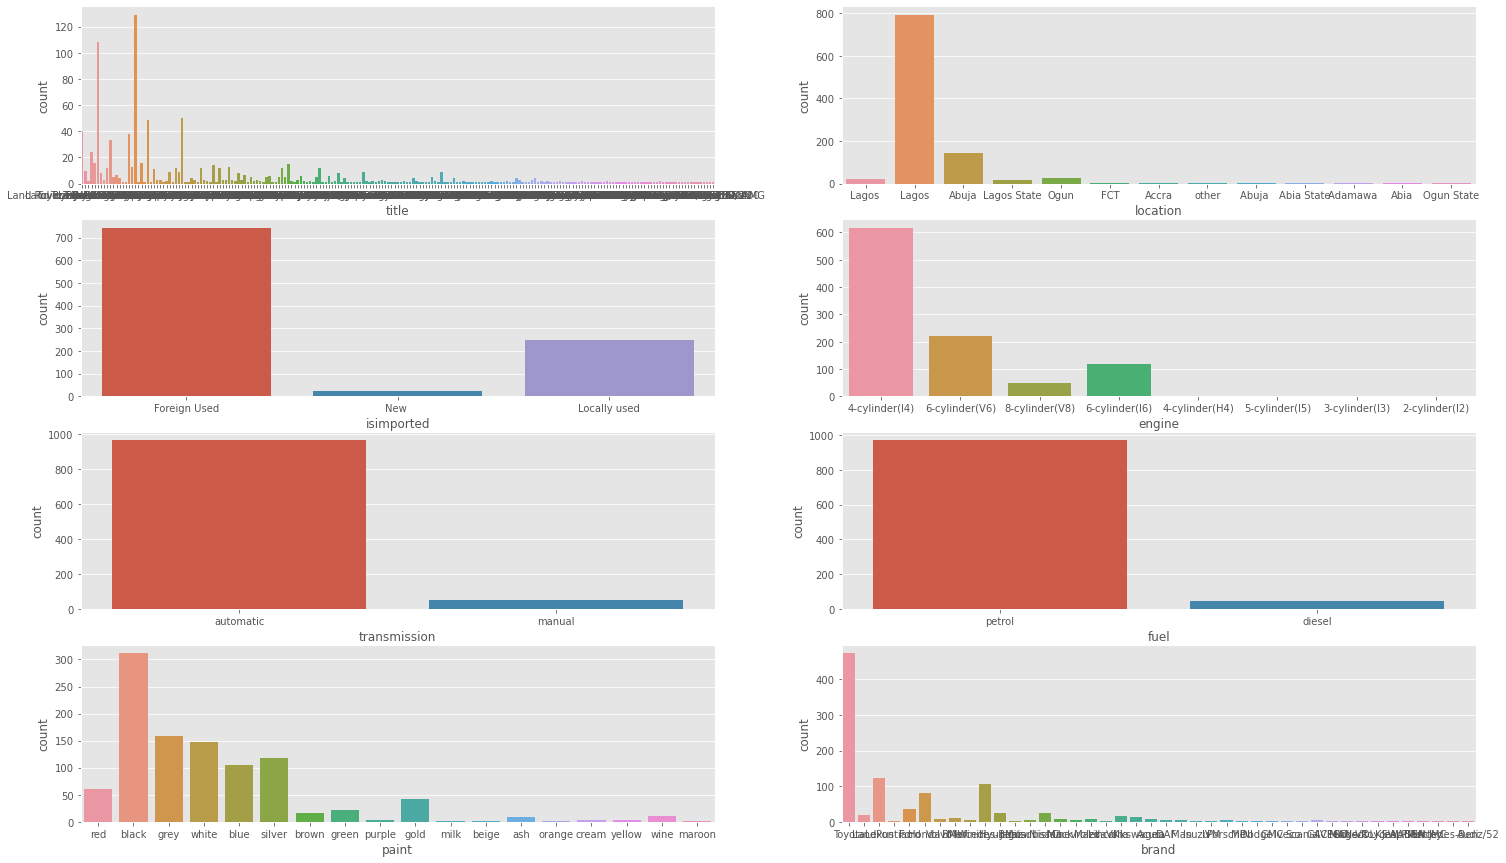

In [72]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
count = 1

for i in train.describe(include="object").columns:
    plt.subplot(4,2,count)
    # countplot 을 사용해서 데이터의 분포를 살핌.
    sns.countplot(data=train, x=i)
    count += 1

title과 brand는 너무 unique 카테고리가 많아서 알아 보기 어려움

따라서 count 상위 15개 카테고리만 뽑아 확인

In [73]:
train_title10 = train[train['title'].apply(lambda x : x in train['title'].value_counts()[:10].keys())]
train_brand10 = train[train['brand'].apply(lambda x : x in train['brand'].value_counts()[:10].keys())]

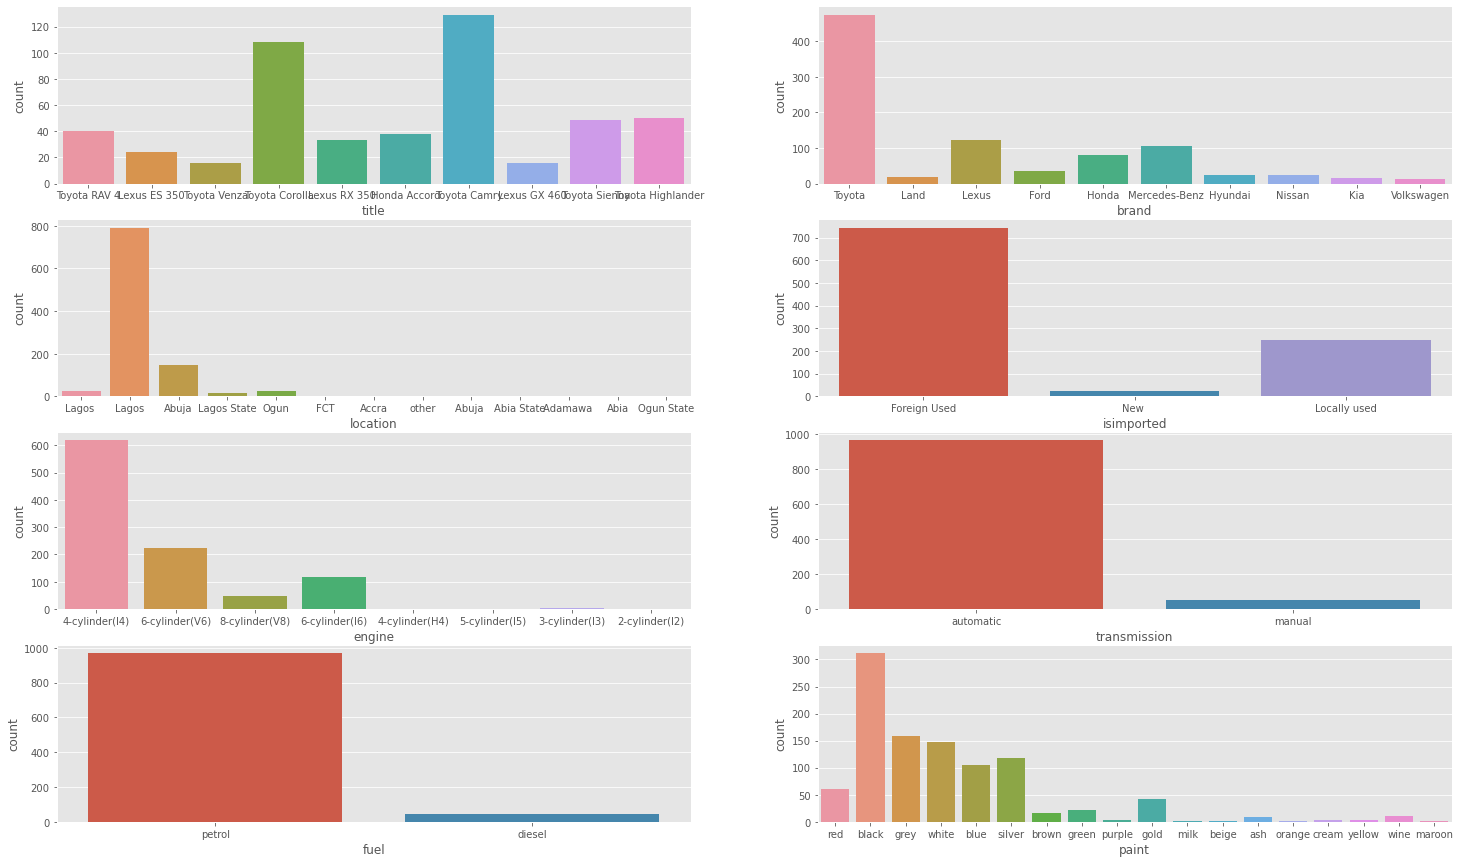

In [74]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.countplot(data=train_title10, x='title')
plt.subplot(4,2,2)
sns.countplot(data=train_brand10, x='brand')
count = 3

for i in train.describe(include="object").columns.drop(['title'])[:-1]:
    plt.subplot(4,2,count)
    sns.countplot(data=train, x=i)
    count += 1

#  범주형 인사이트 <a class="anchor" id="section_2_9"></a>

인사이트

해석 결과

title과 brand에서 Toyota가 압도적으로 중고차가 많다는 것을 확인

location에서 Lagos 지역이 압도적으로 중고차가 많다는 것을 확인

isimported에서 New 차는 적고, Foreign Used>Locally used>New 순으로 중고차 대수가 이루어진 것을 확인

engine에서 4-cylinder가 압도적으로 중고차가 많다는 것을 확인

trainsmission에서 automatic가 압도적으로 중고차가 많다는 것을 확인

fuel에서 petrol가 압도적으로 중고차가 많다는 것을 확인

paint에서 black>grey>white>sliver>red>gold .. 순으로 중고차 대수가 이루어진 것을 확인

이를 통하여 isimported, transmission, fuel 등 몇몇 피쳐들이 데이터가 불균형이 심한 것을 확인할 수 있었습니다. 따라서 몇몇 피쳐들을 가지고 모델이 
정답값인 중고차 가격을 잘 맞추기엔 데이터가 부족할 수 있을 것 같다는 생각이 듬

따라서 이 문제를 해결하기 위하여 부족한 데이터를 증강 하는 것이 좋다고 생각하지만 대회규칙상 다른 데이터사용 불가.

# title 라벨링 <a class="anchor" id="section_2_10"></a>

In [164]:
# train, test 데이터에 있는 모든 car title 합치기
car_title = pd.concat([train.title, test.title], ignore_index = True)
car_title = set(car_title)
car_title

{'ALPINA B3',
 'Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura TSX',
 'Acura ZDX',
 'Audi S6',
 'BMW 325',
 'BMW 335',
 'BMW 525',
 'BMW 528',
 'BMW 535',
 'BMW 730',
 'BMW 740',
 'BMW 745',
 'BMW 750',
 'BMW X3',
 'BMW X6',
 'Bentley Arnage',
 'Chevrolet Camaro',
 'Chevrolet Evanda',
 'Chevrolet Traverse',
 'DAF 45',
 'DAF 95XF TRACTOR HEAD',
 'DAF CF',
 'DAF FA 55. 180',
 'DAF XF TRACTOR HEAD',
 'Dodge Charger',
 'Fiat Ducato',
 'Ford Edge',
 'Ford Escape',
 'Ford Expedition',
 'Ford Explorer',
 'Ford F 150',
 'Ford Focus',
 'Ford Fusion',
 'Ford Mondeo',
 'Ford Mustang',
 'Ford TRANSIT PICKUP',
 'Ford Transit',
 'GAC Gonow Other',
 'GMC Terrain',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Insight',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Hyundai Tucson',
 'Hyundai ix35',
 'IVECO EUROTECH 7.50E-16',
 'IVM LT35',
 'Infiniti FX',

In [168]:
# label 생성을 위한 dictionary 생성
car_title_label = {car_title : label for label, car_title in enumerate(car_title)}
car_title_label

{'Mazda CX-9': 0,
 'Mercedes-Benz C 180': 1,
 'Hyundai Tucson': 2,
 'Mercedes-Benz GL 450': 3,
 'Infiniti JX': 4,
 'Chevrolet Camaro': 5,
 'Honda Crosstour': 6,
 'Lexus GS 350': 7,
 'Mercedes-Benz GLK 350': 8,
 'Toyota Camry': 9,
 'Mack CH613 CONVENTIONAL CAB': 10,
 'Land Rover Range Rover Sport': 11,
 'Bentley Arnage': 12,
 'Iveco EUROCARGO 120e18': 13,
 'BMW X6': 14,
 'Hyundai ix35': 15,
 'Mitsubishi CANTER PICK UP': 16,
 'Mercedes-Benz 814': 17,
 'Acura RDX': 18,
 'Nissan Quest': 19,
 'Toyota Sequoia': 20,
 'Porsche Cayenne': 21,
 'Isuzu NQR': 22,
 'Rolls-Royce Ghost': 23,
 'Toyota Tundra': 24,
 'Lexus LS 460': 25,
 'Mercedes-Benz E 550': 26,
 'Mercedes-Benz ML 430': 27,
 'Mercedes-Benz E 200': 28,
 'Audi S6': 29,
 'Honda Odyssey': 30,
 'Nissan Maxima': 31,
 'Lexus ES 330': 32,
 'Mack R-686ST': 33,
 'BMW 740': 34,
 'Toyota Hiace': 35,
 'BMW 535': 36,
 'Mercedes-Benz C 350': 37,
 'Land Rover Discovery': 38,
 'Nissan Primera': 39,
 'Nissan Cabstar': 40,
 'Mercedes-Benz CABIN PLUS CHAS

In [169]:
# 생성된 dictionary를 이용하여 car title labeling
train['title'] = train['title'].replace(car_title_label)
test['title'] = test['title'].replace(car_title_label)

# location 라벨링 <a class="anchor" id="section_2_11"></a>

In [170]:
# 변수에 띄어쓰기나 같은 도시인데 표기법이 다른 경우 하나로 묶어줌
train.location.unique()

array(['Lagos ', 'Lagos', 'Abuja', 'Lagos State', 'Ogun', 'FCT', 'Accra',
       'other', 'Abuja ', 'Abia State', 'Adamawa ', 'Abia', 'Ogun State'],
      dtype=object)

In [171]:
test.location.unique()

array(['Abuja', 'Lagos', 'Lagos ', 'Ogun', 'Mushin', 'Lagos State',
       'other', 'Abuja ', 'Arepo ogun state ', 'Ogun State', 'Abia'],
      dtype=object)

In [172]:
train['location'] = train['location'].replace({
    'Abia State' : 'Abia',
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun'
    })

In [173]:
test['location'] = test['location'].replace({
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun',
    'Arepo ogun state ' : 'Ogun'
})

In [174]:
#train data와 test data에 공통적으로 존재하는 값을 제외하고 other로 통합하기
set(set(train.location.unique()) | set(test.location.unique())) - set(set(train.location.unique()) & set(test.location.unique()))

{'Accra', 'Adamawa ', 'FCT', 'Mushin'}

In [175]:
train['location'] = train['location'].replace({
    'Accra' : 'other',
    'Adamawa ' : 'other',
    'FCT' : 'other',
    'Mushin' : 'other'
})

train.location.unique()

array(['Lagos', 'Abuja', 'Ogun', 'other', 'Abia'], dtype=object)

In [176]:
test['location'] = test['location'].replace({
    'Accra' : 'other',
    'Adamawa ' : 'other',
    'FCT' : 'other',
    'Mushin' : 'other'
})

test.location.unique()

array(['Abuja', 'Lagos', 'Ogun', 'other', 'Abia'], dtype=object)

In [177]:
# labeling 작업
location_label = {location : label for label, location in enumerate(train.location.unique())}
location_label

{'Lagos': 0, 'Abuja': 1, 'Ogun': 2, 'other': 3, 'Abia': 4}

In [178]:
train['location'] = train['location'].replace(location_label)
test['location'] = test['location'].replace(location_label)

# paint 라벨링 <a class="anchor" id="section_2_12"></a>

In [179]:
paint_label = {_paint : label for label, _paint in enumerate(set(pd.concat([train.paint, test.paint])))}

In [180]:
paint_label

{'White ': 0,
 'Pale brown': 1,
 'Light silver ': 2,
 'SILVER': 3,
 'Off white': 4,
 'Green ': 5,
 'Light Gold': 6,
 'Dark gray': 7,
 'White orchild pearl': 8,
 'Ash and black': 9,
 'Sliver ': 10,
 'Black.': 11,
 'Classic Silver Met(1F7)': 12,
 'Blac': 13,
 'Deep Blue': 14,
 'Grey and black': 15,
 'Blue ': 16,
 'blue': 17,
 'orange': 18,
 'red': 19,
 'Silver/grey': 20,
 'Sky blue': 21,
 '  Brown': 22,
 'Midnight Black Metal': 23,
 'White and green': 24,
 'BLACK': 25,
 'Indigo ink pearl': 26,
 'Ash': 27,
 'Super White': 28,
 'black': 29,
 'Yellow': 30,
 'Dark Green': 31,
 'Silver ': 32,
 'Magnetic Gray': 33,
 'yellow': 34,
 'Black': 35,
 'Magnetic Gray Metallic': 36,
 'Black ': 37,
 'Whine ': 38,
 'White': 39,
 'Ink blue': 40,
 'Sliver': 41,
 'green': 42,
 'Gray ': 43,
 'Navy blue': 44,
 'DARK GREY': 45,
 'Black and silver': 46,
 'Maroon': 47,
 'Blue': 48,
 'WHITE': 49,
 'Skye blue': 50,
 'Black sand pearl': 51,
 'Gery': 52,
 'Redl': 53,
 'WINE': 54,
 'Deep blue': 55,
 'Wine': 56,
 'Dar

In [181]:
train['paint'] = train['paint'].replace(paint_label)
test['paint'] = test['paint'].replace(paint_label)

# engine 라벨링 <a class="anchor" id="section_2_13"></a>

In [182]:
#train 또는 test 데이터세트에서 공통적으로 존재하지 않은 경우 가장 가까운 실린더 갯수로 통합
set(set(train.engine.unique()) | set(test.engine.unique())) - set(set(train.engine.unique()) & set(test.engine.unique()))

{'12-cylinder(V12)', '4-cylinder(H4)'}

In [183]:
#4-cylinder(H4) -> 4-cylinder(I4)로 통합
train[train.engine == '4-cylinder(H4)']

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
327,327,9,3656,1,Foreign Used,4-cylinder(H4),automatic,petrol,83,2020,20015000
830,830,217,152229,0,Foreign Used,4-cylinder(H4),automatic,petrol,60,2007,2765000


In [184]:
train = train.replace({'4-cylinder(H4)' : '4-cylinder(I4)'})

In [185]:
train.iloc[[327, 830]]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
327,327,9,3656,1,Foreign Used,4-cylinder(I4),automatic,petrol,83,2020,20015000
830,830,217,152229,0,Foreign Used,4-cylinder(I4),automatic,petrol,60,2007,2765000


In [186]:
#'12-cylinder(V12)' -> '8-cylinder(V8)'로 통합
test[test.engine == '12-cylinder(V12)']

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
142,142,166,6758,0,New,12-cylinder(V12),automatic,petrol,35,2019


In [187]:
test = test.replace({'12-cylinder(V12)' : '8-cylinder(V8)'})

In [188]:
test.iloc[[142]]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
142,142,166,6758,0,New,8-cylinder(V8),automatic,petrol,35,2019


In [189]:
engine_label = {_engine : label for label, _engine in enumerate(set(pd.concat([train.engine, test.engine])))}
engine_label

{'5-cylinder(I5)': 0,
 '4-cylinder(I4)': 1,
 '6-cylinder(V6)': 2,
 '2-cylinder(I2)': 3,
 '8-cylinder(V8)': 4,
 '6-cylinder(I6)': 5,
 '3-cylinder(I3)': 6}

In [190]:
train = train.replace(engine_label)
test = test.replace(engine_label)

# year 라벨링 <a class="anchor" id="section_2_14"></a>


In [191]:
train[(train.year == 1217) | (train.year == 1218)] 

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
415,415,137,403461,0,Locally used,1,manual,diesel,85,1218,6015000
827,827,67,510053,0,Locally used,2,manual,diesel,85,1217,75015000


In [192]:
test[(test.year == 1324) | (test.year == 1726) | (test.year == 2626)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
304,304,41,650923,0,Locally used,2,manual,diesel,17,1324
406,406,110,0,0,Locally used,4,manual,diesel,85,2626
411,411,216,701934,0,Locally used,4,manual,diesel,85,1726


In [193]:
#train data 에서 415번과 827번, test data 에서 304번과 411번 차량의 경우 평균과 중앙값인 2010년으로 변경

#test data에서 406번 차량의 경우 주행거리가 0이므로 가장 최신년도인 2020년으로 변경

train['year'] = train['year'].replace([1218, 1217], [2010, 2010])
test['year'] = test['year'].replace([1324, 1726, 2626], [2010, 2010, 2020])

In [194]:
train.iloc[[415, 827]]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
415,415,137,403461,0,Locally used,1,manual,diesel,85,2010,6015000
827,827,67,510053,0,Locally used,2,manual,diesel,85,2010,75015000


In [195]:
test.iloc[[304, 406, 411]]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
304,304,41,650923,0,Locally used,2,manual,diesel,17,2010
406,406,110,0,0,Locally used,4,manual,diesel,85,2020
411,411,216,701934,0,Locally used,4,manual,diesel,85,2010


# 특이점이 없는 isimported, transmission, fuel 라벨링 <a class="anchor" id="section_2_15"></a>

In [196]:
isimported_label = {'Foreign Used': 0, 'Locally used' : 1, 'New ' : 2}
transmission_label = {'automatic' : 0, 'manual' : 1}
fuel_label = {'petrol' : 0, 'diesel' : 1}

In [197]:
train['isimported'] = train['isimported'].replace(isimported_label)
test['isimported'] = test['isimported'].replace(isimported_label)

train['transmission'] = train['transmission'].replace(transmission_label)
test['transmission'] = test['transmission'].replace(transmission_label)

train['fuel'] = train['fuel'].replace(fuel_label)
test['fuel'] = test['fuel'].replace(fuel_label)

# 라벨링 처리 후 데이터 <a class="anchor" id="section_2_16"></a>

In [198]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,238,18277,0,0,1,0,0,78,2016,13665000
1,1,209,10,0,2,1,0,0,35,2019,33015000
2,2,159,83091,0,0,2,0,0,78,2012,9915000
3,3,230,91524,0,0,1,0,0,72,2007,3815000
4,4,220,94177,0,0,2,0,0,78,2010,7385000


In [199]:
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,0,141,1234,1,2,1,0,0,39,2017
1,1,217,29938,1,0,1,0,0,39,2013
2,2,43,87501,0,0,1,0,0,35,2012
3,3,233,180894,0,1,2,0,0,60,2001
4,4,35,104814,0,0,1,0,0,39,2000


# 모델링 <a class="anchor" id="chapter3"></a>

# linear Regression 모델을 이용하여 결과값 예측하기 <a class="anchor" id="section_3_1"></a>

In [200]:
#linear Regression 모델을 이용하여 결과값 예측하기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [201]:
train_X = train.drop(['id', 'target'], axis = 1)
train_y = train.target

test_X = test.drop(['id'], axis = 1)

In [202]:
model.fit(train_X, train_y)

LinearRegression()

In [203]:
pred = model.predict(test_X)

In [204]:
submission = sample_submission.copy()
submission.target = pred
submission

,id,target
0,0,2.176790e+07
1,1,9.418189e+06
2,2,9.748552e+06
3,3,-3.171161e+05
4,4,-4.389342e+06
...,...,...
431,431,1.182084e+07
432,432,7.466198e+06
433,433,1.061022e+07
434,434,-1.795755e+06


In [205]:
submission.to_csv('submission.csv', index = False)

# 결과 <a class="anchor" id="chapter4"></a>

학습시킨 모델을 Test 데이터에 적용한 결과 0.6490197747로 예측결과가 좋지 않게 나타남

이 데이터를 가지고 분석을 했을 때 아쉬웠던 점은 데이터양과 종류였습니다.

누가 이차를 탔는지, 옵션은 뭐가 들어가있는지, 사고 유무, 색이 유광인지 무광인지 무늬가 있는지 등등 중고차 가격책정에 있어 필요한 정보들이 부족하다고 판단했습니다.